# Bootstrapping(Resampling) Confidence Interval

**Bootstrapping** is a **non-parametric method** for estimating the uncertainty of a statistic (like a mean or median) by **resampling with replacement** from the original dataset. It is especially helpful when:

- The sample size is small

- The population distribution is unknown or skewed

- The statistic is complex or difficult to analyze analytically

---

## t-based CI vs. Bootstrap CI

| Feature                          | t-based Confidence Interval            | Bootstrap Confidence Interval           |
|----------------------------------|----------------------------------------|------------------------------------------|
| Assumes normal population?       | ✅ Yes                                  | ❌ No                                     |
| Requires standard deviation?     | ✅ Uses sample standard deviation       | ❌ Not required                           |
| Suitable for...                  | Large samples, normal distribution     | Small samples, skewed/unknown distributions |
| Method type                      | Theory-based (Central Limit Theorem)   | Simulation-based (empirical percentiles) |

---

## How Does Bootstrapping Work?

Imagine you're a data analyst at a small startup.

Your manager asks you:

> “What’s the **average salary** at our company? And how confident are you about it?”

You only have salary data from **10 employees**. You know this isn’t enough to fully represent the entire company, but it's all you have.

To provide a reliable estimate, you use **bootstrapping** — a powerful method that helps answer:

- What’s a plausible range for the **true average salary**?

- How much **uncertainty** is in my estimate?

- Can I construct a **confidence interval** without assuming a normal distribution?

### Step 1: Original Sample

Start with a small observed dataset (e.g., 10 salary values):

| Sample Type        | Sample Content                                  |
|--------------------|--------------------------------------------------|
| Original Dataset   | `x₁, x₂, x₃, x₄, x₅, x₆, x₇, x₈, x₉, x₁₀`        |


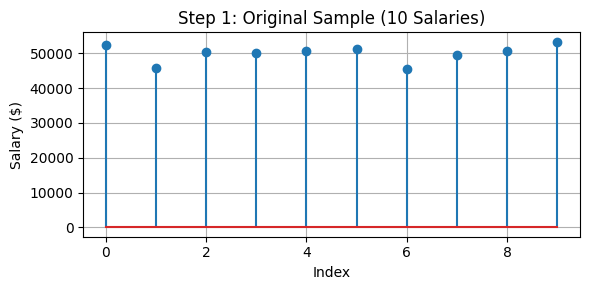

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Step 1: Original sample (10 salaries)
original_sample = np.random.randint(45000, 55000, size=10)

# --- Step 1 Visualization ---
plt.figure(figsize=(6, 3))
plt.stem(original_sample)
plt.title("Step 1: Original Sample (10 Salaries)")
plt.ylabel("Salary ($)")
plt.xlabel("Index")
plt.grid(True)
plt.tight_layout()
plt.show()



### Step 2: Resample With Replacement

From this original sample, draw a new sample of the **same size** (10), **with replacement**. This is called a **bootstrap sample**.

| Sample Type        | Sample Content                                  |
|--------------------|--------------------------------------------------|
| Original Dataset   | `x₁, x₂, x₃, x₄, x₅, x₆, x₇, x₈, x₉, x₁₀`        |
| Bootstrap Sample 1 | `x₆, x₆, x₁, x₈, x₉, x₁, x₁₀, x₅, x₇, x₂`        |

> Because it's with replacement, some values appear more than once, others may not appear at all.

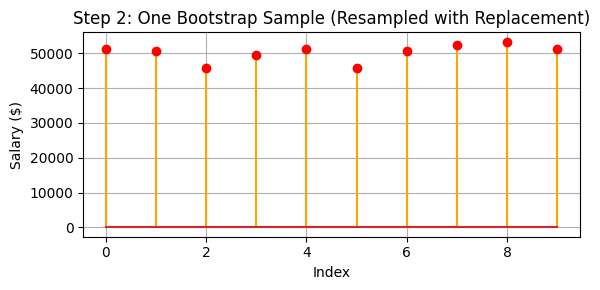

In [8]:
# Step 2: Draw a bootstrap sample (with replacement)
bootstrap_sample = np.random.choice(original_sample, size=len(original_sample), replace=True)

# --- Step 2 Visualization ---
plt.figure(figsize=(6, 3))
plt.stem(bootstrap_sample, linefmt='orange', markerfmt='ro')
plt.title("Step 2: One Bootstrap Sample (Resampled with Replacement)")
plt.ylabel("Salary ($)")
plt.xlabel("Index")
plt.grid(True)
plt.tight_layout()
plt.show()

### Step 3: Compute the Statistic

Calculate the **mean** of the bootstrap sample:

| Sample Type        | Sample Content                                   | Mean       |
|--------------------|---------------------------------------------------|------------|
| Original Dataset   | `x₁, x₂, x₃, x₄, x₅, x₆, x₇, x₈, x₉, x₁₀`         | NA  |
| Bootstrap Sample 1 | `x₆, x₆, x₁, x₈, x₉, x₁, x₁₀, x₅, x₇, x₂`         | `mean₁`    |


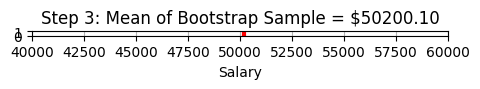

In [9]:
# Step 3: Compute mean of bootstrap sample
bootstrap_mean = np.mean(bootstrap_sample)

# --- Step 3 Visualization ---
plt.figure(figsize=(5, 1))
plt.axvline(bootstrap_mean, color='red', linestyle='-', linewidth=3)
plt.title(f"Step 3: Mean of Bootstrap Sample = ${bootstrap_mean:.2f}")
plt.xlabel("Salary")
plt.xlim(40000, 60000)
plt.grid(True)
plt.tight_layout()
plt.show()


### Step 4: Repeat B Times

Repeat this process **1000**(any reasonable value) times to get 1000 bootstrap sample means.

| Sample Type          | Sample Content                                   | Mean       |
|----------------------|---------------------------------------------------|------------|
| Original Dataset     | `x₁, x₂, x₃, x₄, x₅, x₆, x₇, x₈, x₉, x₁₀`         | N/A        |
| Bootstrap Sample 1   | `x₆, x₆, x₁, x₈, x₉, x₁, x₁₀, x₅, x₇, x₂`         | `mean₁`    |
| Bootstrap Sample 2   | `x₃, x₇, x₇, x₄, x₁₀, x₅, x₃, x₆, x₉, x₂`         | `mean₂`    |
| Bootstrap Sample 3   | `x₄, x₄, x₆, x₁, x₅, x₂, x₁₀, x₈, x₈, x₈`         | `mean₃`    |
| ...                  | `...`                                             | `...`      |
| Bootstrap Sample 1000| `x₂, x₂, x₅, x₅, x₅, x₈, x₉, x₁₀, x₃, x₆`         | `mean₁₀₀₀` |

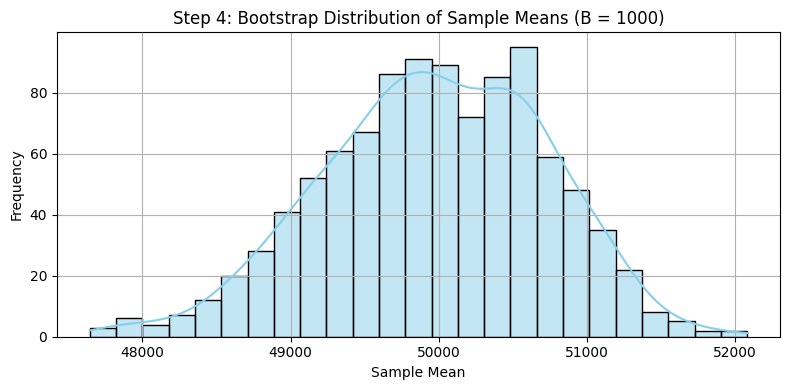

In [10]:
# Step 4: Repeat B times to get bootstrap distribution
B = 1000
boot_means = []
for _ in range(B):
    bs = np.random.choice(original_sample, size=len(original_sample), replace=True)
    boot_means.append(np.mean(bs))

# --- Step 4 Visualization ---
plt.figure(figsize=(8, 4))
sns.histplot(boot_means, bins=25, kde=True, color="skyblue")
plt.title("Step 4: Bootstrap Distribution of Sample Means (B = 1000)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

### Step 5: Construct the Confidence Interval

Sort the 1000 bootstrap means and extract the middle 95%: **95% Bootstrap CI = [2.5th percentile, 97.5th percentile]**

- The histogram shows the distribution of 1000 bootstrap sample means. It’s approximately normal, even though the original dataset is small (n = 10).

- The red vertical line represents the mean of the original sample.

- The green dashed lines mark the 2.5th and 97.5th percentiles, forming the 95% bootstrap confidence interval.

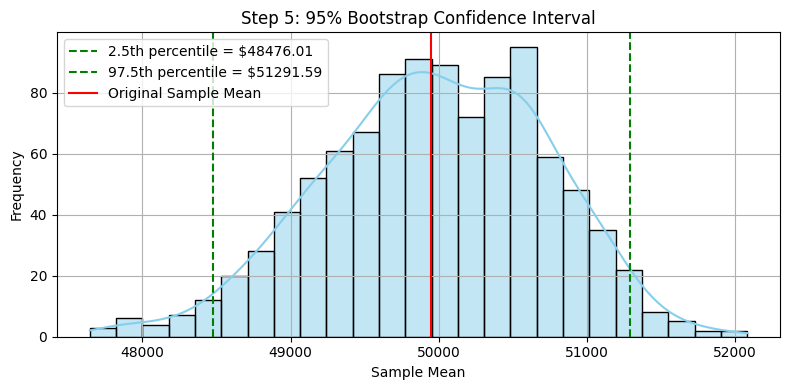

In [11]:
# Step 5: Calculate 95% confidence interval
ci_lower, ci_upper = np.percentile(boot_means, [2.5, 97.5])

# --- Step 5 Visualization ---
plt.figure(figsize=(8, 4))
sns.histplot(boot_means, bins=25, kde=True, color="skyblue")
plt.axvline(ci_lower, color='green', linestyle='--', label=f"2.5th percentile = ${ci_lower:.2f}")
plt.axvline(ci_upper, color='green', linestyle='--', label=f"97.5th percentile = ${ci_upper:.2f}")
plt.axvline(np.mean(original_sample), color='red', linestyle='-', label="Original Sample Mean")
plt.title("Step 5: 95% Bootstrap Confidence Interval")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusion

> We are 95% confident that the true average salary in the population lies between $48,476.01 and $51,291.59.

- This range was constructed without assuming a normal distribution, purely by resampling from the observed data.

- The original sample mean falls nicely in the center of this interval, suggesting our data is reasonably balanced.

- The width of the interval (~$2,815) reflects the uncertainty caused by the small sample size.

**Why It Matters:**

- With only 10 data points, a traditional confidence interval might be misleading or too dependent on normality assumptions.

- Bootstrapping provides a robust alternative — it’s entirely data-driven and captures the actual variation in your estimate.

- This makes bootstrapping especially valuable when working with small, noisy, or non-normal datasets.